In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller
from sklearn.multioutput import MultiOutputRegressor



In [3]:
start = dt.datetime(2014, 3, 4)
# Set date to 10 years back
end = dt.datetime(2024, 3, 4)
start, end


(datetime.datetime(2014, 3, 4, 0, 0), datetime.datetime(2024, 3, 4, 0, 0))

In [4]:
# Get the data
yf.pdr_override()
stocks = ['AAPL', 'MSFT', 'GOOG','META','INTC','NVDA','OTP.BD','MOL.BD']
data = pdr.get_data_yahoo(stocks, start=start, end=end)
data


[*********************100%%**********************]  8 of 8 completed


Price        Adj Close                                                  \
Ticker            AAPL        GOOG       INTC        META       MOL.BD   
Date                                                                     
2014-03-04   16.711584   30.259331  18.668531   68.727081  1083.458496   
2014-03-05   16.746813   30.342768  18.585085   71.494141  1072.493896   
2014-03-06   16.696169   30.376392  18.683699   70.764915  1089.955933   
2014-03-07   16.686422   30.256342  18.691286   69.726021  1081.427979   
2014-03-10   16.701515   30.176142  18.842997   71.953651  1074.930542   
...                ...         ...        ...         ...          ...   
2024-02-26  181.160004  138.750000  42.990002  481.739990  2946.000000   
2024-02-27  182.630005  140.100006  42.730000  487.049988  2892.000000   
2024-02-28  181.419998  137.429993  41.990002  484.019989  2900.000000   
2024-02-29  180.750000  139.779999  43.049999  490.130005  2890.000000   
2024-03-01  179.660004  138.080002  43.820000  502.299988  2926.000000   

Price                                                  Close              ...  \
Ticker            MSFT        NVDA        OTP.BD        AAPL        GOOG  ...   
Date                                                                      ...   
2014-03-04   32.525780    4.378354   3242.407227   18.972857   30.259331  ...   
2014-03-05   32.271736    4.416261   3255.312256   19.012857   30.342768  ...   
2014-03-06   32.305614    4.354661   3185.947266   18.955357   30.376392  ...   
2014-03-07   32.093899    4.349921   3096.418213   18.944286   30.256342  ...   
2014-03-10   32.026150    4.285953   2999.629639   18.961430   30.176142  ...   
...                ...         ...           ...         ...         ...  ...   
2024-02-26  407.540009  790.919983  17235.000000  181.160004  138.750000  ...   
2024-02-27  407.480011  787.010010  17085.000000  182.630005  140.100006  ...   
2024-02-28  407.720001  776.630005  17265.000000  181.419998  137.429993  ...   
2024-02-29  413.640015  791.119995  17415.000000  180.750000  139.779999  ...   
2024-03-01  415.500000  822.789978  17425.000000  179.660004  138.080002  ...   

Price             Open                Volume                          \
Ticker            NVDA   OTP.BD         AAPL        GOOG        INTC   
Date                                                                   
2014-03-04    4.595000   3891.0  259140000.0  58928052.0  23661200.0   
2014-03-05    4.615000   4050.0  200062800.0  49597208.0  21036200.0   
2014-03-06    4.667500   4036.0  185488800.0  50914126.0  22371700.0   
2014-03-07    4.615000   3880.0  220729600.0  60831159.0  25373400.0   
2014-03-10    4.575000   3795.0  178584000.0  48766105.0  24908100.0   
...                ...      ...          ...         ...         ...   
2024-02-26  797.000000  17410.0   40867400.0  33513000.0  27035400.0   
2024-02-27  793.809998  17240.0   54318900.0  22364000.0  25126400.0   
2024-02-28  776.200012  17090.0   48953900.0  30628700.0  26928500.0   
2024-02-29  790.940002  17300.0  136682600.0  35485000.0  48875100.0   
2024-03-01  800.000000  17415.0   73488000.0  28522000.0  41396900.0   

Price                                                                
Ticker            META    MOL.BD        MSFT        NVDA     OTP.BD  
Date                                                                 
2014-03-04  42013500.0  739664.0  26802400.0  26034400.0  1813036.0  
2014-03-05  74567700.0  568416.0  20520100.0  24147200.0  1762596.0  
2014-03-06  46026500.0  382824.0  23582200.0  29014400.0  1324731.0  
2014-03-07  38927000.0  543872.0  26591600.0  26845200.0  1469974.0  
2014-03-10  59871600.0  670288.0  19006600.0  30088800.0  1375344.0  
...                ...       ...         ...         ...        ...  
2024-02-26  12101400.0  172254.0  16193500.0  50397300.0   319551.0  
2024-02-27  10809600.0  661268.0  14835800.0  39170500.0   475928.0  
2024-02-28  12715500.0  310521.0  13183100.0  393

In [5]:
# Get the adjusted close price
data = data['Adj Close']
data


Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
Date,,,,,,,,
2014-03-04,16.711584,30.259331,18.668531,68.727081,1083.458496,32.525780,4.378354,3242.407227
2014-03-05,16.746813,30.342768,18.585085,71.494141,1072.493896,32.271736,4.416261,3255.312256
2014-03-06,16.696169,30.376392,18.683699,70.764915,1089.955933,32.305614,4.354661,3185.947266
2014-03-07,16.686422,30.256342,18.691286,69.726021,1081.427979,32.093899,4.349921,3096.418213
2014-03-10,16.701515,30.176142,18.842997,71.953651,1074.930542,32.026150,4.285953,2999.629639
...,...,...,...,...,...,...,...,...
2024-02-26,181.160004,138.750000,42.990002,481.739990,2946.000000,407.540009,790.919983,17235.000000
2024-02-27,182.630005,140.100006,42.730000,487.049988,2892.000000,407.480011,787.010010,17085.000000
2024-02-28,181.419998,137.429993,41.990002,484.019989,2900.000000,407.720001,776.630005,17265.000000


In [6]:
# Calculate the daily returns
returns = data.pct_change()
returns



/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/2106346442.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change()


Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
Date,,,,,,,,
2014-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-05,0.002108,0.002757,-0.004470,0.040262,-0.010120,-0.007811,0.008658,0.003980
2014-03-06,-0.003024,0.001108,0.005306,-0.010200,0.016282,0.001050,-0.013948,-0.021308
2014-03-07,-0.000584,-0.003952,0.000406,-0.014681,-0.007824,-0.006554,-0.001088,-0.028101
2014-03-10,0.000904,-0.002651,0.008117,0.031948,-0.006008,-0.002111,-0.014706,-0.031258
...,...,...,...,...,...,...,...,...
2024-02-26,-0.007451,-0.045013,0.000000,-0.004731,0.004775,-0.006824,0.003489,-0.009483
2024-02-27,0.008114,0.009730,-0.006048,0.011023,-0.018330,-0.000147,-0.004944,-0.008703
2024-02-28,-0.006625,-0.019058,-0.017318,-0.006221,0.002766,0.000589,-0.013189,0.010536


In [7]:
# drop the missing values
returns = returns.dropna()
returns


Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
Date,,,,,,,,
2014-03-05,0.002108,0.002757,-0.004470,0.040262,-0.010120,-0.007811,0.008658,0.003980
2014-03-06,-0.003024,0.001108,0.005306,-0.010200,0.016282,0.001050,-0.013948,-0.021308
2014-03-07,-0.000584,-0.003952,0.000406,-0.014681,-0.007824,-0.006554,-0.001088,-0.028101
2014-03-10,0.000904,-0.002651,0.008117,0.031948,-0.006008,-0.002111,-0.014706,-0.031258
2014-03-11,0.009738,-0.009558,-0.004429,-0.026794,-0.016245,0.005288,0.009951,-0.021780
...,...,...,...,...,...,...,...,...
2024-02-26,-0.007451,-0.045013,0.000000,-0.004731,0.004775,-0.006824,0.003489,-0.009483
2024-02-27,0.008114,0.009730,-0.006048,0.011023,-0.018330,-0.000147,-0.004944,-0.008703
2024-02-28,-0.006625,-0.019058,-0.017318,-0.006221,0.002766,0.000589,-0.013189,0.010536


In [8]:
returns.describe()

Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
count,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000,2591.000000
mean,0.001071,0.000737,0.000538,0.001043,0.000514,0.001124,0.002439,0.000840
std,0.017549,0.017394,0.020370,0.023336,0.016128,0.016770,0.029040,0.019387
min,-0.128647,-0.111008,-0.180415,-0.263901,-0.118166,-0.147390,-0.187559,-0.215294
25%,-0.006644,-0.006902,-0.008582,-0.008915,-0.007952,-0.006391,-0.011023,-0.008218
50%,0.000398,0.000471,0.000269,0.000496,0.000000,0.000473,0.001659,0.000000
75%,0.009667,0.008933,0.010052,0.011981,0.008695,0.009290,0.016029,0.010305
max,0.119808,0.160524,0.195213,0.232824,0.133538,0.142169,0.298068,0.133743


In [9]:
# Constructing a Monte Carlo simulation for the entire period in order to determine the weights of the portfolio
# Number of assets

n_assets = len(stocks)
n_assets

# Number of simulations
n_sims = 100000

# Create an array to store the weights
weights = np.zeros((n_sims, n_assets))

# Create an array to store the returns
port_returns = np.zeros(n_sims)

# Create an array to store the volatility
port_volatility = np.zeros(n_sims)

# Create an array to store the Sharpe Ratio
sharpe_ratio = np.zeros(n_sims)

# Create an array to store the risk-free rate
risk_free = 0.06

# Create an array to store the expected returns
expected_returns = returns.mean()

# Create an array to store the covariance matrix
cov_matrix = returns.cov()

# Create an array to store the number of trading days
trading_days = 2591

# Create a for loop to run the simulations

for i in range(n_sims):
    # Create random weights
    weight = np.array(np.random.random(n_assets))
    weight /= np.sum(weight)
    
    # Save the weights
    weights[i, :] = weight
    
    # Save the returns
    port_returns[i] = np.sum(expected_returns * weight) * trading_days
    
    # Save the volatility
    port_volatility[i] = np.sqrt(np.dot(weight.T, np.dot(cov_matrix, weight))) * np.sqrt(trading_days)
    
    # Save the Sharpe Ratio
    sharpe_ratio[i] = (port_returns[i] - risk_free) / port_volatility[i]

# Create a dictionary to store the weights
weights_dict = {}

# Create a for loop to store the weights
for i, stock in enumerate(stocks):
    weights_dict[stock + ' weight'] = weights[:, i]

# Create a dictionary to store the results
results_dict = {'Returns': port_returns, 'Volatility': port_volatility, 'Sharpe Ratio': sharpe_ratio}

# Combine the two dictionaries
results_dict = {**results_dict, **weights_dict}

# Create a DataFrame to store the results
entire_results = pd.DataFrame(results_dict)
entire_results

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,GOOG weight,META weight,INTC weight,NVDA weight,OTP.BD weight,MOL.BD weight
0,2.478306,0.673533,3.590477,0.080443,0.165110,0.153705,0.127948,0.146576,0.065100,0.103017,0.158101
1,2.252190,0.648957,3.378018,0.100628,0.156073,0.198852,0.095808,0.195099,0.042028,0.071569,0.139942
2,2.956729,0.706052,4.102714,0.059579,0.013623,0.152545,0.045264,0.170002,0.114300,0.218047,0.226639
3,2.361732,0.646749,3.558925,0.233758,0.035166,0.055901,0.171550,0.227690,0.185875,0.015450,0.074611
4,2.998998,0.762643,3.853704,0.087740,0.167868,0.083389,0.122487,0.090960,0.220325,0.176263,0.050968
...,...,...,...,...,...,...,...,...,...,...,...
99995,2.567107,0.716015,3.501475,0.169400,0.094546,0.117095,0.195594,0.067620,0.213986,0.048976,0.092783
99996,2.164204,0.667962,3.150185,0.032945,0.220990,0.095545,0.217619,0.190840,0.131029,0.012620,0.098413
99997,2.915703,0.692276,4.125090,0.173537,0.035258,0.107284,0.050643,0.163974,0.140520,0.177955,0.150829
99998,3.303038,0.797288,4.067584,0.202057,0.176057,0.014265,0.078239,0.051714,0.198115,0.222143,0.057409


In [10]:
# Find the index of the portfolio with the highest Sharpe Ratio
entire_max_sharpe_port = entire_results.iloc[entire_results['Sharpe Ratio'].idxmax()]
entire_max_sharpe_port


Returns          3.955658
Volatility       0.855567
Sharpe Ratio     4.553307
AAPL weight      0.118070
MSFT weight      0.042131
GOOG weight      0.002138
META weight      0.003183
INTC weight      0.018022
NVDA weight      0.187885
OTP.BD weight    0.385322
MOL.BD weight    0.243248
Name: 30269, dtype: float64

In [11]:
# Find the index of the portfolio with the lowest volatility
entire_min_vol_port = entire_results.iloc[entire_results['Volatility'].idxmin()]
entire_min_vol_port


Returns          1.963008
Volatility       0.588693
Sharpe Ratio     3.232596
AAPL weight      0.182741
MSFT weight      0.121543
GOOG weight      0.061248
META weight      0.008212
INTC weight      0.374564
NVDA weight      0.083262
OTP.BD weight    0.002134
MOL.BD weight    0.166296
Name: 83960, dtype: float64

/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/11855395.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(entire_max_sharpe_port[1], entire_max_sharpe_port[0], color='r', s=50)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/11855395.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(entire_min_vol_port[1], entire_min_vol_port[0], color='g', s=50)


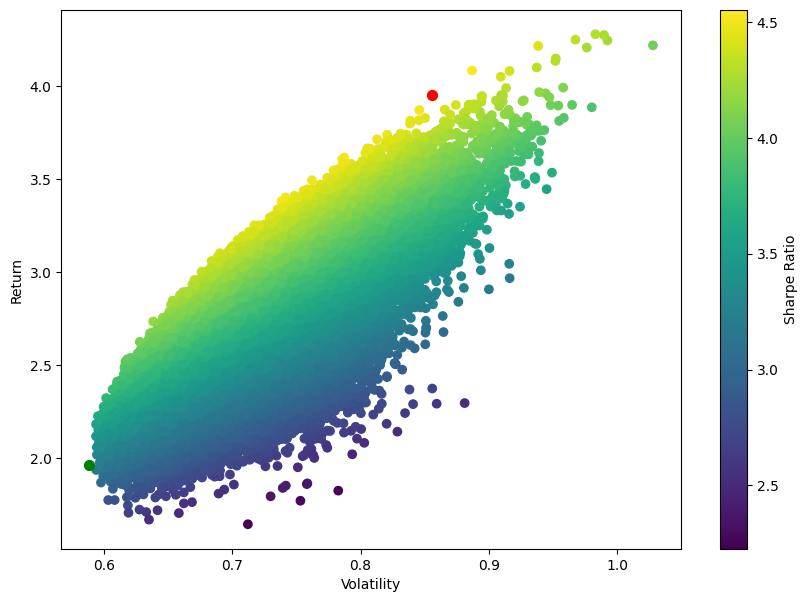

In [12]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(entire_max_sharpe_port[1], entire_max_sharpe_port[0], color='r', s=50)
plt.scatter(entire_min_vol_port[1], entire_min_vol_port[0], color='g', s=50)
plt.show()



In [13]:
# split the data to pre-covid, during covid and post-covid 
pre_covid = returns.loc[:'2020-03-04']
during_covid = returns.loc['2020-03-04':'2021-06-30']
post_covid = returns.loc['2021-07-01':]




In [14]:
pre_covid.describe()

Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
count,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,0.001072,0.000640,0.000792,0.000820,0.000457,0.001143,0.002105,0.001022
std,0.015440,0.014753,0.016016,0.017994,0.013813,0.014395,0.025415,0.015241
min,-0.099607,-0.076966,-0.091020,-0.189609,-0.068644,-0.092534,-0.187559,-0.074616
25%,-0.005640,-0.005880,-0.007071,-0.006908,-0.007801,-0.005401,-0.008850,-0.007176
50%,0.000399,0.000130,0.000555,0.000614,0.000000,0.000489,0.001361,0.000000
75%,0.008849,0.007963,0.008526,0.010389,0.008269,0.007864,0.013061,0.009619
max,0.093101,0.160524,0.105519,0.155214,0.054393,0.104522,0.298068,0.080334


In [15]:
post_covid.describe()

Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.000560,0.000343,0.000013,0.001027,0.000824,0.000808,0.002619,0.000521
std,0.017017,0.020098,0.022692,0.031144,0.016259,0.017560,0.033955,0.023841
min,-0.058679,-0.096350,-0.119072,-0.263901,-0.091437,-0.077156,-0.094726,-0.215294
25%,-0.008399,-0.010756,-0.011896,-0.011776,-0.006548,-0.008469,-0.017015,-0.009475
50%,0.000033,0.000201,0.000000,0.000000,0.000000,0.000000,0.001549,0.000554
75%,0.009619,0.010869,0.011914,0.014314,0.008988,0.010858,0.020063,0.011633
max,0.088974,0.077460,0.106586,0.232824,0.065599,0.082268,0.243696,0.133743


In [16]:
during_covid.describe()

Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.002230,0.002073,0.000579,0.002181,0.000079,0.001780,0.003800,0.000665
std,0.025852,0.022086,0.030728,0.026403,0.023881,0.023848,0.033669,0.025378
min,-0.128647,-0.111008,-0.180415,-0.142530,-0.118166,-0.147390,-0.184521,-0.172020
25%,-0.009236,-0.006348,-0.010876,-0.011909,-0.011770,-0.008977,-0.011442,-0.010122
50%,0.000725,0.002402,0.000235,0.001287,0.000000,0.001403,0.003185,0.000736
75%,0.015625,0.012124,0.013151,0.015613,0.010655,0.012346,0.024339,0.013366
max,0.119808,0.094017,0.195213,0.102350,0.133538,0.142169,0.171564,0.123022


In [17]:
# Constructing a Monte Carlo simulation for the pre-covid period in order to determine the weights of the portfolio
# Number of assets

n_assets = len(stocks)
n_assets

# Number of simulations
n_sims = 100000

# Create an array to store the weights
weights = np.zeros((n_sims, n_assets))

# Create an array to store the returns
port_returns = np.zeros(n_sims)

# Create an array to store the volatility
port_volatility = np.zeros(n_sims)

# Create an array to store the Sharpe Ratio
sharpe_ratio = np.zeros(n_sims)

# Create an array to store the risk-free rate
risk_free = 0.06

# Create an array to store the expected returns
expected_returns = pre_covid.mean()

# Create an array to store the covariance matrix
cov_matrix = pre_covid.cov()

# Create an array to store the number of trading days
trading_days = 1560

# Create a for loop to run the simulations

for i in range(n_sims):
    # Create random weights
    weight = np.array(np.random.random(n_assets))
    weight /= np.sum(weight)
    
    # Save the weights
    weights[i, :] = weight
    
    # Save the returns
    port_returns[i] = np.sum(expected_returns * weight) * trading_days
    
    # Save the volatility
    port_volatility[i] = np.sqrt(np.dot(weight.T, np.dot(cov_matrix, weight))) * np.sqrt(trading_days)
    
    # Save the Sharpe Ratio
    sharpe_ratio[i] = (port_returns[i] - risk_free) / port_volatility[i]

# Create a dictionary to store the weights
weights_dict = {}

# Create a for loop to store the weights
for i, stock in enumerate(stocks):
    weights_dict[stock + ' weight'] = weights[:, i]

# Create a dictionary to store the results
results_dict = {'Returns': port_returns, 'Volatility': port_volatility, 'Sharpe Ratio': sharpe_ratio}

# Combine the two dictionaries
results_dict = {**results_dict, **weights_dict}

# Create a DataFrame to store the results
pre_results = pd.DataFrame(results_dict)
pre_results

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,GOOG weight,META weight,INTC weight,NVDA weight,OTP.BD weight,MOL.BD weight
0,1.587935,0.406072,3.762718,0.013936,0.031741,0.039383,0.145527,0.140881,0.221035,0.091130,0.316365
1,1.546816,0.418095,3.556167,0.050364,0.117353,0.138550,0.127667,0.152565,0.116399,0.130884,0.166217
2,1.397673,0.488373,2.739041,0.120233,0.198640,0.288245,0.254596,0.022838,0.035323,0.064909,0.015215
3,1.673391,0.451912,3.570141,0.180320,0.131987,0.034784,0.159842,0.096876,0.129803,0.158363,0.108026
4,1.361221,0.430697,3.021198,0.036794,0.035109,0.355508,0.081413,0.265265,0.112156,0.089425,0.024330
...,...,...,...,...,...,...,...,...,...,...,...
99995,1.433026,0.407757,3.367263,0.093927,0.200484,0.202898,0.044722,0.080724,0.133660,0.049686,0.193899
99996,1.619559,0.412820,3.777814,0.126065,0.036361,0.141633,0.061293,0.161539,0.154858,0.130532,0.187719
99997,1.641451,0.467712,3.381246,0.215414,0.165932,0.229692,0.048541,0.058722,0.035459,0.161137,0.085104
99998,1.231101,0.448394,2.611768,0.146279,0.324365,0.156504,0.211120,0.083425,0.029300,0.005716,0.043291


In [18]:
# Find the index of the portfolio with the highest Sharpe Ratio
pre_max_sharpe_port = pre_results.iloc[pre_results['Sharpe Ratio'].idxmax()]
pre_max_sharpe_port

Returns          2.040906
Volatility       0.477970
Sharpe Ratio     4.144414
AAPL weight      0.079694
MSFT weight      0.011691
GOOG weight      0.001173
META weight      0.002369
INTC weight      0.001879
NVDA weight      0.206889
OTP.BD weight    0.243340
MOL.BD weight    0.452966
Name: 34355, dtype: float64

In [19]:
# Find the index of the portfolio with the lowest volatility
pre_min_vol_port = pre_results.iloc[pre_results['Volatility'].idxmin()]
pre_min_vol_port

Returns          1.305281
Volatility       0.373497
Sharpe Ratio     3.334111
AAPL weight      0.104086
MSFT weight      0.035640
GOOG weight      0.118644
META weight      0.073863
INTC weight      0.280671
NVDA weight      0.166880
OTP.BD weight    0.003576
MOL.BD weight    0.216639
Name: 75371, dtype: float64

/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/1062520860.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(pre_max_sharpe_port[1], pre_max_sharpe_port[0], color='r', s=50)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/1062520860.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(pre_min_vol_port[1], pre_min_vol_port[0], color='g', s=50)


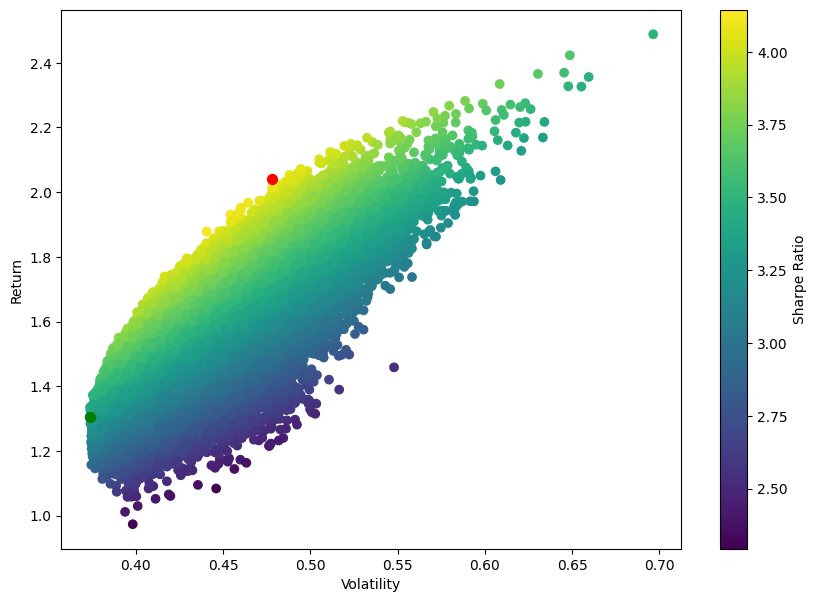

In [20]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(pre_max_sharpe_port[1], pre_max_sharpe_port[0], color='r', s=50)
plt.scatter(pre_min_vol_port[1], pre_min_vol_port[0], color='g', s=50)
plt.show()


In [21]:
# Constructing a Monte Carlo simulation for the during-covid period in order to determine the weights of the portfolio
# Number of assets

n_assets = len(stocks)
n_assets

# Number of simulations
n_sims = 100000

# Create an array to store the weights
weights = np.zeros((n_sims, n_assets))

# Create an array to store the returns
port_returns = np.zeros(n_sims)

# Create an array to store the volatility
port_volatility = np.zeros(n_sims)

# Create an array to store the Sharpe Ratio
sharpe_ratio = np.zeros(n_sims)

# Create an array to store the risk-free rate
risk_free = 0.06

# Create an array to store the expected returns
expected_returns = during_covid.mean()

# Create an array to store the covariance matrix
cov_matrix = during_covid.cov()

# Create an array to store the number of trading days
trading_days = 342

# Create a for loop to run the simulations

for i in range(n_sims):
    # Create random weights
    weight = np.array(np.random.random(n_assets))
    weight /= np.sum(weight)
    
    # Save the weights
    weights[i, :] = weight
    
    # Save the returns
    port_returns[i] = np.sum(expected_returns * weight) * trading_days
    
    # Save the volatility
    port_volatility[i] = np.sqrt(np.dot(weight.T, np.dot(cov_matrix, weight))) * np.sqrt(trading_days)
    
    # Save the Sharpe Ratio
    sharpe_ratio[i] = (port_returns[i] - risk_free) / port_volatility[i]

# Create a dictionary to store the weights
weights_dict = {}

# Create a for loop to store the weights
for i, stock in enumerate(stocks):
    weights_dict[stock + ' weight'] = weights[:, i]

# Create a dictionary to store the results
results_dict = {'Returns': port_returns, 'Volatility': port_volatility, 'Sharpe Ratio': sharpe_ratio}

# Combine the two dictionaries
results_dict = {**results_dict, **weights_dict}

# Create a DataFrame to store the results
during_results = pd.DataFrame(results_dict)
during_results


,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,GOOG weight,META weight,INTC weight,NVDA weight,OTP.BD weight,MOL.BD weight
0,0.529647,0.349198,1.344931,0.167969,0.199989,0.069483,0.165445,0.213053,0.014077,0.064997,0.104986
1,0.673220,0.375001,1.635250,0.211673,0.208718,0.010456,0.021965,0.117408,0.116430,0.186652,0.126699
2,0.742138,0.390336,1.747565,0.116951,0.169555,0.001362,0.084443,0.024417,0.101507,0.273263,0.228502
3,0.522387,0.360540,1.282484,0.184362,0.092526,0.106834,0.146758,0.099638,0.192537,0.023687,0.153658
4,0.458393,0.358855,1.110179,0.065977,0.061283,0.191549,0.118037,0.177049,0.118038,0.094328,0.173739
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.460883,0.341935,1.172398,0.082484,0.144817,0.084293,0.013383,0.249671,0.047660,0.137173,0.240520
99996,0.583713,0.408489,1.282076,0.103549,0.011261,0.224690,0.165228,0.079920,0.231507,0.134489,0.049356
99997,0.546779,0.363228,1.340145,0.238459,0.068004,0.064145,0.163383,0.206473,0.145818,0.057831,0.055887
99998,0.553399,0.380997,1.295021,0.157700,0.095313,0.165788,0.055890,0.167711,0.172962,0.129933,0.054704


In [22]:
# Find the index of the portfolio with the highest Sharpe Ratio
during_max_sharpe_port = during_results.iloc[during_results['Sharpe Ratio'].idxmax()]
during_max_sharpe_port


Returns          0.957408
Volatility       0.465535
Sharpe Ratio     1.927691
AAPL weight      0.002914
MSFT weight      0.090456
GOOG weight      0.000568
META weight      0.193548
INTC weight      0.001490
NVDA weight      0.051690
OTP.BD weight    0.527153
MOL.BD weight    0.132182
Name: 52653, dtype: float64

In [23]:
# Find the index of the portfolio with the lowest volatility
during_min_vol_port = during_results.iloc[during_results['Volatility'].idxmin()]
during_min_vol_port


Returns          0.398278
Volatility       0.324454
Sharpe Ratio     1.042609
AAPL weight      0.078132
MSFT weight      0.155427
GOOG weight      0.001169
META weight      0.072655
INTC weight      0.285702
NVDA weight      0.170388
OTP.BD weight    0.008314
MOL.BD weight    0.228213
Name: 17326, dtype: float64

/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/3808134707.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(during_max_sharpe_port[1], during_max_sharpe_port[0], color='r', s=50)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/3808134707.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(during_min_vol_port[1], during_min_vol_port[0], color='g', s=50)


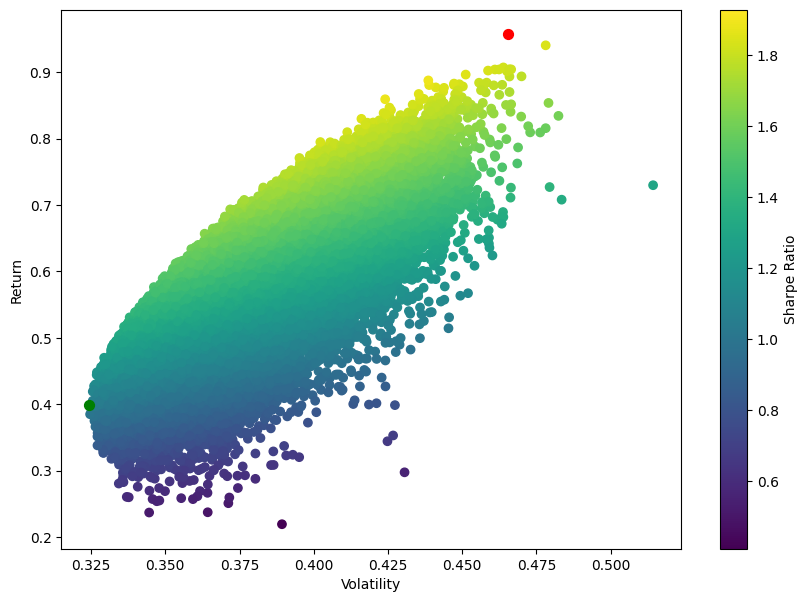

In [24]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(during_max_sharpe_port[1], during_max_sharpe_port[0], color='r', s=50)
plt.scatter(during_min_vol_port[1], during_min_vol_port[0], color='g', s=50)
plt.show()


In [25]:
# Constructing a Monte Carlo simulation for the post-covid period in order to determine the weights of the portfolio
# Number of assets

n_assets = len(stocks)
n_assets

# Number of simulations

n_sims = 100000

# Create an array to store the weights
weights = np.zeros((n_sims, n_assets))

# Create an array to store the returns

port_returns = np.zeros(n_sims)

# Create an array to store the volatility
port_volatility = np.zeros(n_sims)

# Create an array to store the Sharpe Ratio
sharpe_ratio = np.zeros(n_sims)

# Create an array to store the risk-free rate
risk_free = 0.06

# Create an array to store the expected returns
expected_returns = post_covid.mean()

# Create an array to store the covariance matrix
cov_matrix = post_covid.cov()

# Create an array to store the number of trading days
trading_days = 690

# Create a for loop to run the simulations

for i in range(n_sims):
    # Create random weights
    weight = np.array(np.random.random(n_assets))
    weight /= np.sum(weight)
    
    # Save the weights
    weights[i, :] = weight
    
    # Save the returns
    port_returns[i] = np.sum(expected_returns * weight) * trading_days
    
    # Save the volatility
    port_volatility[i] = np.sqrt(np.dot(weight.T, np.dot(cov_matrix, weight))) * np.sqrt(trading_days)
    
    # Save the Sharpe Ratio
    sharpe_ratio[i] = (port_returns[i] - risk_free) / port_volatility[i]

# Create a dictionary to store the weights
weights_dict = {}

# Create a for loop to store the weights
for i, stock in enumerate(stocks):
    weights_dict[stock + ' weight'] = weights[:, i]

# Create a dictionary to store the results
results_dict = {'Returns': port_returns, 'Volatility': port_volatility, 'Sharpe Ratio': sharpe_ratio}

# Combine the two dictionaries
results_dict = {**results_dict, **weights_dict}

# Create a DataFrame to store the results
post_results = pd.DataFrame(results_dict)
post_results

,Returns,Volatility,Sharpe Ratio,AAPL weight,MSFT weight,GOOG weight,META weight,INTC weight,NVDA weight,OTP.BD weight,MOL.BD weight
0,0.666942,0.447675,1.355764,0.037860,0.099430,0.084857,0.229084,0.099761,0.122627,0.154201,0.172181
1,0.732511,0.491507,1.368263,0.059653,0.016952,0.189119,0.153312,0.013325,0.241983,0.231756,0.093900
2,0.584435,0.395152,1.327171,0.100598,0.186169,0.107558,0.095058,0.170778,0.020146,0.145033,0.174660
3,0.665763,0.472386,1.282347,0.156544,0.051680,0.149080,0.200924,0.017690,0.106104,0.183568,0.134409
4,0.612130,0.435764,1.267039,0.189154,0.005415,0.158851,0.167912,0.045838,0.128472,0.145192,0.159166
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.450486,0.432355,0.903159,0.165614,0.095944,0.223930,0.239568,0.086014,0.048373,0.045298,0.095259
99996,0.807549,0.467067,1.600518,0.003484,0.149543,0.060657,0.194208,0.186523,0.005816,0.262248,0.137522
99997,0.508346,0.367255,1.220804,0.181364,0.135956,0.122592,0.072945,0.178649,0.033232,0.092748,0.182514
99998,0.481436,0.412780,1.020971,0.009777,0.163461,0.241826,0.100523,0.082035,0.176973,0.096206,0.129199


In [26]:
# Find the index of the portfolio with the highest Sharpe Ratio
post_max_sharpe_port = post_results.iloc[post_results['Sharpe Ratio'].idxmax()]
post_max_sharpe_port


Returns          1.087546
Volatility       0.504801
Sharpe Ratio     2.035547
AAPL weight      0.016081
MSFT weight      0.003834
GOOG weight      0.087334
META weight      0.025067
INTC weight      0.366138
NVDA weight      0.032400
OTP.BD weight    0.460748
MOL.BD weight    0.008397
Name: 13282, dtype: float64

In [27]:
# Find the index of the portfolio with the lowest volatility
post_min_vol_port = post_results.iloc[post_results['Volatility'].idxmin()]
post_min_vol_port


Returns          0.435838
Volatility       0.315356
Sharpe Ratio     1.191790
AAPL weight      0.169927
MSFT weight      0.094827
GOOG weight      0.069806
META weight      0.000270
INTC weight      0.300191
NVDA weight      0.211598
OTP.BD weight    0.002163
MOL.BD weight    0.151219
Name: 87238, dtype: float64

/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/1457434309.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(post_max_sharpe_port[1], post_max_sharpe_port[0], color='r', s=50)
/var/folders/sl/mz3bx1nj3_94rwgrcx6b1pqh0000gn/T/ipykernel_1904/1457434309.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(post_min_vol_port[1], post_min_vol_port[0], color='g', s=50)


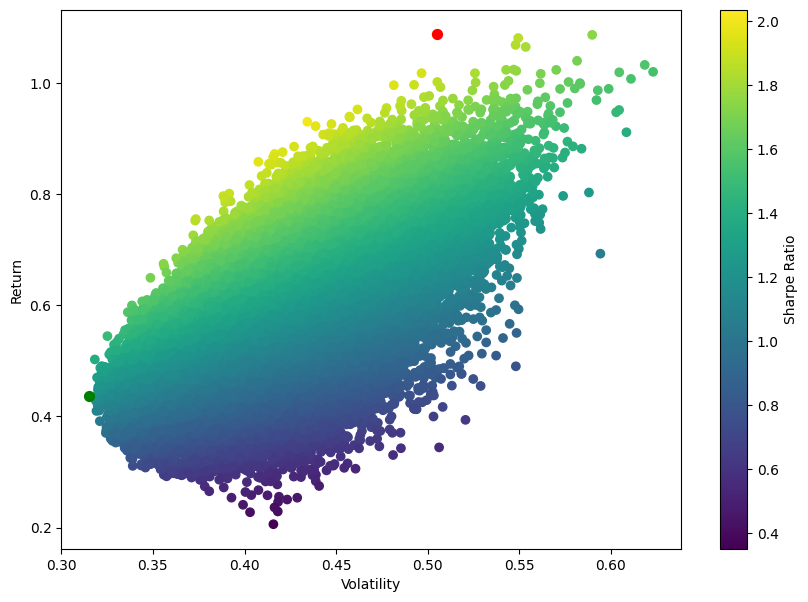

In [28]:
# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(post_max_sharpe_port[1], post_max_sharpe_port[0], color='r', s=50)
plt.scatter(post_min_vol_port[1], post_min_vol_port[0], color='g', s=50)
plt.show()


In [29]:
# Analyze the correlation between the stocks to ensure adequate diversification
correlation = returns.corr()
correlation


Ticker,AAPL,GOOG,INTC,META,MOL.BD,MSFT,NVDA,OTP.BD
Ticker,,,,,,,,
AAPL,1.000000,0.607290,0.518194,0.528188,0.136073,0.678379,0.552741,0.146678
GOOG,0.607290,1.000000,0.488175,0.635291,0.160070,0.714593,0.539780,0.167429
INTC,0.518194,0.488175,1.000000,0.421326,0.156615,0.577739,0.501966,0.158153
META,0.528188,0.635291,0.421326,1.000000,0.116108,0.569057,0.480441,0.141834
MOL.BD,0.136073,0.160070,0.156615,0.116108,1.000000,0.160327,0.139106,0.410141
MSFT,0.678379,0.714593,0.577739,0.569057,0.160327,1.000000,0.607606,0.164916
NVDA,0.552741,0.539780,0.501966,0.480441,0.139106,0.607606,1.000000,0.143596
OTP.BD,0.146678,0.167429,0.158153,0.141834,0.410141,0.164916,0.143596,1.000000


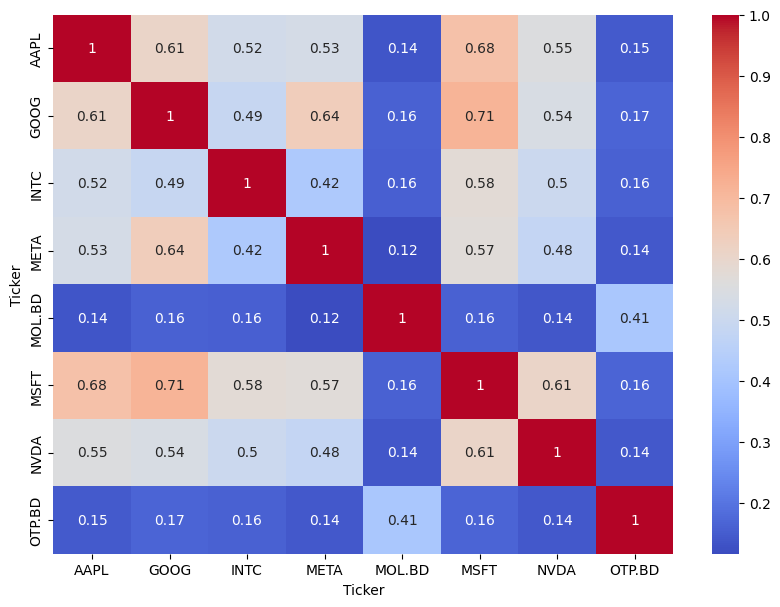

In [30]:
# Plot the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


In [31]:
# Conduct a Suppor Vector Regression (SVR) to predict the stock prices
entire_normality_results = {}
for ticker in returns.columns:
    # Test for normality
    stat, p = shapiro(returns[ticker])
    entire_normality_results[ticker] = {'statistic': stat, 'p-value': p}

for ticker, result in entire_normality_results.items():
    print(f'{ticker} - statistic: {result["statistic"]}, p-value: {result["p-value"]}')


AAPL - statistic: 0.935581723023992, p-value: 4.165375681994885e-32
GOOG - statistic: 0.9263860973332538, p-value: 6.8497423505291874e-34
INTC - statistic: 0.8962513963493808, p-value: 1.0363986151396144e-38
META - statistic: 0.8507195636939497, p-value: 3.453230414673666e-44
MOL.BD - statistic: 0.9478764489433387, p-value: 2.224030059903063e-29
MSFT - statistic: 0.9206575635862844, p-value: 6.479927939266286e-35
NVDA - statistic: 0.9152295780914388, p-value: 7.833843410150651e-36
OTP.BD - statistic: 0.8958421159249896, p-value: 9.083977117476067e-39


In [32]:
# Test for stationarity
# Augmented Dickey-Fuller Test
entire_stationarity_results = {}
for ticker in returns.columns:
    # Test for stationarity
    result = adfuller(returns[ticker])
    entire_stationarity_results[ticker] = {'ADF Statistic': result[0], 'p-value': result[1]}

for ticker, result in entire_stationarity_results.items():
    print(f'{ticker} - ADF Statistic: {result["ADF Statistic"]}, p-value: {result["p-value"]}')



AAPL - ADF Statistic: -12.956960772762557, p-value: 3.28567543854081e-24
GOOG - ADF Statistic: -14.425501766469075, p-value: 7.784397215913663e-27
INTC - ADF Statistic: -14.482274404451118, p-value: 6.343818363689287e-27
META - ADF Statistic: -14.06013146840307, p-value: 3.066980243577258e-26
MOL.BD - ADF Statistic: -37.32766567235893, p-value: 0.0
MSFT - ADF Statistic: -14.186702518516999, p-value: 1.8874073148873984e-26
NVDA - ADF Statistic: -16.44602924990698, p-value: 2.4028768142746862e-29
OTP.BD - ADF Statistic: -23.072387942271504, p-value: 0.0


In [1]:
returns

NameError: name 'returns' is not defined

In [ ]:
# SVR
weights = np.array([0.118070, 0.042131, 0.002138, 0.003183, 0.018022, 0.187885, 0.385322, 0.243248])

# Ensure the 'returns' DataFrame is in the same order as the weights: ['AAPL', 'MSFT', 'GOOG', 'META', 'INTC', 'NVDA', 'OTP.BD', 'MOL.BD']
portfolio_returns = (returns * weights).sum(axis=1)

# Create a DataFrame to store the portfolio returns
portfolio_returns = pd.DataFrame(portfolio_returns, columns=['Portfolio Returns'])
portfolio_returns


,Portfolio Returns
Date,
2014-03-05,0.003138
2014-03-06,-0.010399
2014-03-07,-0.008909
2014-03-10,-0.013661
2014-03-11,-0.000110
...,...
2024-02-26,-0.004950
2024-02-27,-0.002990
2024-02-28,-0.004001


In [ ]:
# 